# Watts-Strogatz Graph from Scratch

In the last note [Small World Graph](http://nbviewer.jupyter.org/github/XiaoTaoWang/Think-Complexity-Notes/blob/master/notebooks/Small-World-Graph.ipynb), I took down the main idea of Watts and Strogatz underlying their generative model for small-world graphs, I also replicated their experiments using *networkx*'s builtin functions. In this note, I'll step into the implementation details of it.

In [1]:
%load_ext watermark

In [2]:
%watermark -v -p networkx,matplotlib

CPython 2.7.12
IPython 5.1.0

networkx 1.11
matplotlib 1.5.3


## Ring Lattice

Watts and Strogatz use a kind of regular graph - *ring lattice* as the basis of their model. In a ring lattice, nodes are arranged in a circle with each node connecting the k nearest neighbors. Here, I define a function named *ring_lattice_edges* which takes a list of nodes and an interger number *k*, and yields one edge of corresponding ring lattice at a time.

In [3]:
def ring_lattice_edges(nodes, k):
    half = k // 2
    n = len(nodes)
    for i, v in enumerate(nodes):
        for j in range(i+1, i+half+1):
            w = nodes[j % n]
            yield v, w

Then given *n* and *k*, we can generate a ring lattice in a way that we are familar with:

In [4]:
import networkx as nx

def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = ring_lattice_edges(nodes, k)
    G.add_edges_from(edges)
    return G

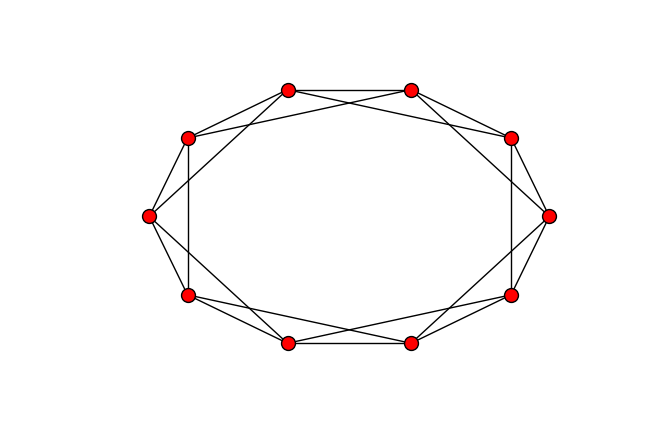

In [5]:
import matplotlib.pyplot as plt

G = make_ring_lattice(10, 4)
nx.draw_circular(G, node_size=100)
plt.show()

## Rewire edges with probability *p*

Watts and Strogatz then iterates each edge of a ring lattice and rewire it with probability *p*. If an edge would be rewired, they leave the first node unchanged and choose the second node at random. Besides, they don't allow a node connect to itself or more than one edges between two nodes.

Here is an implementation:

In [6]:
import random

def rewire(G, p):
    for v, w in G.edges():
        if random.random() < p:
            G.remove_edge(v, w)
            choices = set(G) - {v} - set(G[v])
            new_w = random.choice(list(choices))
            G.add_edge(v, new_w)

Finally, a complete implementation of Watts-Strogatz model is the combination of *make_ring_lattice* and *rewire*:

In [7]:
def watts_strogatz_graph(n, k, p):
    G = make_ring_lattice(n, k)
    rewire(G, p)
    return G

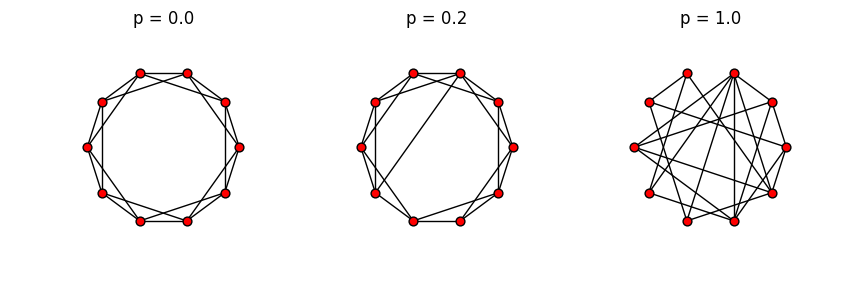

In [8]:
import matplotlib.pyplot as plt

n = 10
k = 4
ps = [0, 0.2, 1]
fig = plt.figure(figsize=(10, 3))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    G = watts_strogatz_graph(n, k, ps[i])
    ax.set_title('p = %.1f' % ps[i])
    nx.draw_circular(G, node_size=40)
plt.show()